<h1 style="font-family:Calibri;color:black;font-size:197%;text-align:center">Master Data science - a.a. 2022-2023 
Final Project of Machine Learning</h1>

<h1 style=";font-family:Calibri;color:violet;font-size:170%;text-align:center;border-radius: px 50px;"> author: Laura Proto </h1>

<a id="1"></a>

<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:190%;text-align:center;border-radius: 50px;">The Stroke Prediction Dataset</h1>

In [1]:
from PIL import Image
from IPython.display import display, HTML

In [2]:
display(HTML("<div style='display:flex; justify-content:center;'><img src='stroke-main.jpg' style='max-width:100%;'></div>"))

## Il Dataset ---Riscrivere meglio

Secondo l'Organizzazione Mondiale della Sanità (OMS), l'ictus è la seconda causa di morte a livello globale, responsabile di circa l'11% dei decessi totali. Questo set di dati* viene utilizzato per prevedere se un paziente rischia di essere colpito da ictus in base a parametri di input come il sesso, l'età, varie malattie e lo stato di fumatore. Ogni riga dei dati fornisce informazioni rilevanti sul paziente.

*fonte: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

<a id="1"></a>

<h1 style="background-color:#eaeaea;font-family:Calibri;color:blue;font-size:250%;text-align:center;border-radius: 50px;">Libraries</h1>

In [81]:
import utils as ut
import pandas as pd
import numpy as np
import itertools

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import loguniform, beta, uniform

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as IMBPipeline

import missingno as msno

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')


<a id="1"></a>

<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius: 50px;">Data Preprocessing</h1>

In [4]:
#loading data
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv', delimiter = ',')
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Informazioni sugli attributi

1. **id**: identificatore univoco

2. **genere**: Maschio, Femmina o Altro

3. **età**: età del paziente

4. **ipertensione**: 0 se il paziente non ha ipertensione, 1 se ce l'ha ipertensione

5. **malattia_cuore**: 0 se il paziente non ha malattie cardiache, 1 se il paziente ha una malattia cardiaca

6. **mai_sposato**: Sì o No

7. **tipo_lavoro**: Mai lavorato, Privato, Lavoratore autonomo, Governativo, Bambini

8. **Tipo_di_residenza**: Rurale o Urbano

9. **avg_glucose_level**: livello medio di glucosio nel sangue

10. **bmi**: indice di massa corporea

11. **smoking_status**: ha già fumato, non ha mai fumato, fuma o sconosciuto*

12. **ictus**: 1 se il paziente ha avuto un ictus, 0 se non lo ha avuto

*Nota: l'informazione non è disponibile per quel paziente

In [5]:
#find first data's informations
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#Dataset shape
print(f'Il Dataset è costituito da: {df_stroke.shape[0]} righe e da {df_stroke.shape[1]} colonne')

Il Dataset è costituito da: 5110 righe e da 12 colonne


Deep note ci dice già che:
1. i dati sono di tipo int64, object e float64
2. bmi è l'unica colonna ad avere dati mancanti (nan)

In [7]:
#count missing value's of bmi
print('I missing value di bmi sono:',df_stroke.bmi.isnull().sum(axis=0))#witout .bmi work for each columns

I missing value di bmi sono: 201


In [8]:
#Show info about DataFrame
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Nel dataset sono presenti tre tipi di dati:
1. *Categorical* : gender, ever_married, work_type, Residence_type, smoking_status
2. *Binary Numerical* : hypertension,heart_disease, stroke
3. *Continous Numerical* : age, avg_glucose_level, bmi

### Statistics of numerical data

In [9]:
round (df_stroke.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


Le statistiche dei dati numerici dicono che:
- l'età media dei pazienti è circa di 43 anni
- l'età più bassa ha un valore strano che dovrà essere sistemato
- l'età più alta  è di 82 anni

### Statistics of categorical data

In [10]:
round (df_stroke.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
#per vedere i valori univoci
g = df_stroke['gender'].value_counts()
print("Gender's value:",g.index.tolist())
m = df_stroke['ever_married'].value_counts()
print("Ever married's value:",m.index.tolist())
w = df_stroke['work_type'].value_counts()
print("work type's value:",w.index.tolist())
m = df_stroke['Residence_type'].value_counts()
print("Residence type's value:",m.index.tolist())
m = df_stroke['smoking_status'].value_counts()
print("Smoking status's value:",m.index.tolist())

Gender's value: ['Female', 'Male', 'Other']
Ever married's value: ['Yes', 'No']
work type's value: ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked']
Residence type's value: ['Urban', 'Rural']
Smoking status's value: ['never smoked', 'Unknown', 'formerly smoked', 'smokes']


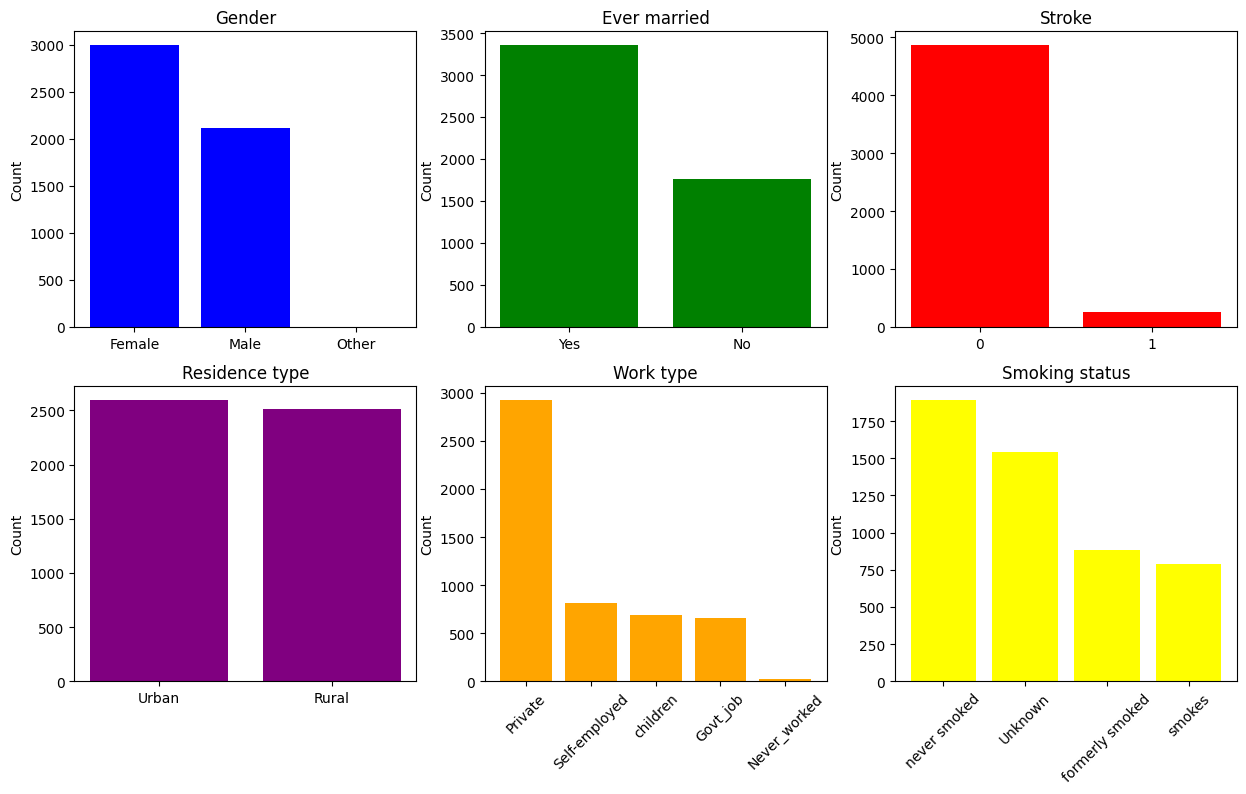

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 5))
ut.bar_graphics (df_stroke, 'gender', 'blue', 'Gender', ax=ax1)
ut.bar_graphics (df_stroke,'ever_married', 'green', 'Ever married', ax=ax2)
ut.bar_graphics (df_stroke,'stroke', 'red', 'Stroke', ax=ax3)
ut.bar_graphics (df_stroke,'Residence_type', 'purple', 'Residence type', ax=ax4)
ut.bar_graphics (df_stroke,'work_type', 'orange', 'Work type', 45, ax=ax5)
ut.bar_graphics (df_stroke,'smoking_status', 'yellow', 'Smoking status',45, ax=ax6)
ut.plt.subplots_adjust(top=0.9, bottom=-0.4)

A colpo d'occhio è possibile vedere che:
- i pazienti sono più donne che uomini
- rispetto al totale, solo una piccola parte è stata colpita da ictus

In [15]:
X = df_stroke.iloc[:, 1:14]  #select everything except the id column
y = df_stroke.iloc[:, -1]  #select stroke column
n_samples, n_features = X.shape
n_samples, n_features

(5110, 11)

<Axes: >

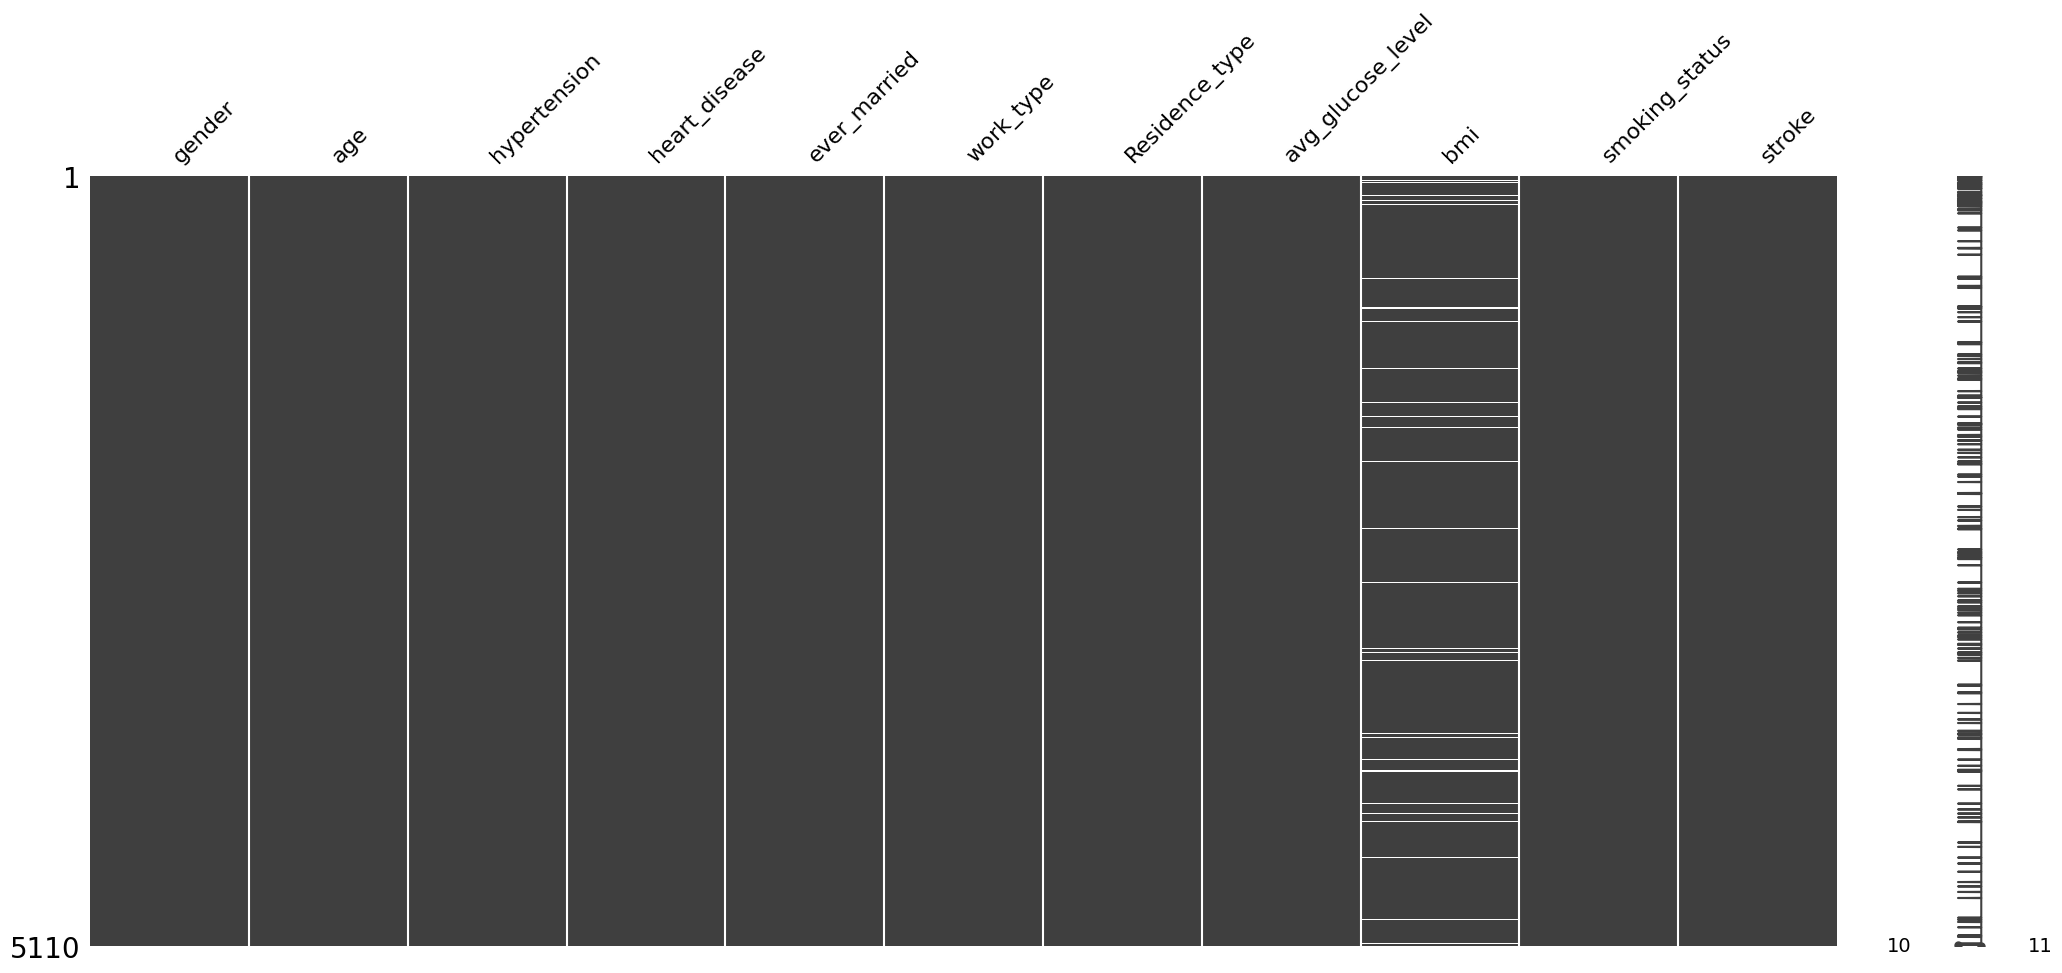

In [16]:
msno.matrix(X)

Il grafico mostra chiaramente che la colonna bmi è piena di valori null, dal momento che non è possibile eliminarla dato che il b.m.i è un dato rilevante; verrà completata e trasformnata nel prossimo passaggio 

### Definition of the Data Transformation Pipeline

In [17]:
display(HTML("<div style='display:flex; justify-content:center;'><img src='pipeline.png' style='max-width:100%;'></div>"))

Le colonne non riportate in figura non necessitano di essere trasformate.

Nel dataset tutte le colonne sono complete, tranne bmi che presenta molti valori mancanti.

Alle colonne con dati di tipo categorico: gender, ever_married, work_type, Residence_type e smoking_status; è possibile usare OneHot Encoder.

La colonna age presenta variabili numeriche con scale diverse, per uniformarla verrà usato Standard Scaler.

KNN Imputer verrà usato solo alla colonna bmi, cosi da sostituire i valori mancanti con quelli più prossimi; infine per uniformare i valori verrà usato anche lo Standard Scaler.

In [35]:
pip = Pipeline([
    ('imp', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

final_transformation = ColumnTransformer(transformers=[
    (('gender ever_married work_type Residence_type smoking_status'), OneHotEncoder(drop='first',categories='auto',handle_unknown='ignore'),['gender','ever_married','work_type','Residence_type', 'smoking_status'] ),
    ('age_column', StandardScaler(),['age']),
    ('bmi_column', pip, ['bmi'] )
],
remainder='drop',
verbose_feature_names_out=False,
sparse_threshold=0
)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=30, shuffle=True)

In [37]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

In [38]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('gender ever_married '
                                                  'work_type Residence_type '
                                                  'smoking_status',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('age_column',
                                                  StandardScaler(), ['age']),
                                                 ('bmi_column',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

In [42]:
model_pipeline.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

In [46]:
np.set_printoptions(threshold=np.inf)
preds = model_pipeline.predict(X_test)
print(preds)

[0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 1 1 

In [48]:
sampler_configs = [
    {
        'sampler':[None],# The element is bypassed
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }
]

dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()],
        'dim_reduction__n_components': [0.5, 0.7, 0.9]
    },
    {
        'dim_reduction': [LDA()]
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    }
]

classifier_configs = [
    {
        'classifier__eta0' : loguniform(0.001,100),
        'classifier': [Perceptron()] ,
        'classifier__max_iter': [1,5,10,15,50,100] ,
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']

    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators' : [10,50,100, 500]
    }
]

In [49]:
for configuration in itertools.product(['a','b'],[1,2,3],['Z','W','Y']):
    print(configuration)

('a', 1, 'Z')
('a', 1, 'W')
('a', 1, 'Y')
('a', 2, 'Z')
('a', 2, 'W')
('a', 2, 'Y')
('a', 3, 'Z')
('a', 3, 'W')
('a', 3, 'Y')
('b', 1, 'Z')
('b', 1, 'W')
('b', 1, 'Y')
('b', 2, 'Z')
('b', 2, 'W')
('b', 2, 'Y')
('b', 3, 'Z')
('b', 3, 'W')
('b', 3, 'Y')


In [50]:
a = ({'a':1},{'b':2},{'c':3})
dict(itertools.chain(*(e.items() for e in a)))

{'a': 1, 'b': 2, 'c': 3}

In [51]:
list(itertools.chain(*(e.items() for e in a)))

[('a', 1), ('b', 2), ('c', 3)]

In [56]:
# 2nd version less compact
all_configs = []
for configuration in itertools.product(sampler_configs,dim_reduction_configs,classifier_configs):
    # Merging of three dictionary into one
    all_parameters = []
    for element in configuration:
        for item in element.items():
            all_parameters.append(item)
    all_configs.append(dict(all_parameters)) # by dict(all_parameters) we create a dict from a list of pairs (key:value)

In [57]:
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 48'

In [59]:
all_configs[:2]

[{'sampler': [None],
  'dim_reduction': [None],
  'classifier__eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fb636ac2dc0>,
  'classifier': [Perceptron()],
  'classifier__max_iter': [1, 5, 10, 15, 50, 100],
  'classifier__class_weight': [None, 'balanced']},
 {'sampler': [None],
  'dim_reduction': [None],
  'classifier': [LogisticRegression(solver='saga')],
  'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fb634f84fa0>,
  'classifier__penalty': ['l1', 'l2'],
  'classifier__class_weight': [None, 'balanced']}]

In [61]:
rs = RandomizedSearchCV(model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

In [ ]:
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3) #3 minutes

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
for index, estimator in enumerate(scores['estimator']):
    print(estimator.best_estimator_.get_params()['sampler'])
    print(estimator.best_estimator_.get_params()['dim_reduction'])
    print(estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print('-'*10)

In [83]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')

F1 on training set:0.0, F1 on test set:0.0
F1 on training set:0.17036701404621657, F1 on test set:0.16576576576576577
F1 on training set:0.28571428571428575, F1 on test set:0.2569832402234637
F1 on training set:0.24006908462867013, F1 on test set:0.25084745762711863
F1 on training set:0.2399283795881826, F1 on test set:0.24406779661016953


In [84]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('classifier',LogisticRegression(solver='saga', penalty = 'l1'))
])

In [85]:
params = {
    'classifier__C': uniform(loc = 15, scale = 60)
}

In [86]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter=20,
    scoring='f1'
)

In [87]:
rs_best.fit(X_train, y_train) #40 sec

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('gender '
                                                                               'ever_married '
                                                                               'work_type '
                                                                               'Residence_type '
                                                                               'smoking_status',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['gender',
                                                                                'ever_married',
                                                                                'work_type',
                                                                                'Residence_type',
                                                                                'sm...
                                                                               StandardScaler(),
                                                                               ['age']),
                                                                              ('bmi_column',
                                                                               Pipeline(steps=[('imp',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['bmi'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              LogisticRegression(penalty='l1',
                                                                 solver='saga'))]),
                   n_iter=20,
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb6374abd00>},
                   scoring='f1')

In [88]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('gender ever_married '
                                                  'work_type Residence_type '
                                                  'smoking_status',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status']),
                                                 ('age_column',
                                                  StandardScaler(), ['age']),
                                                 ('bmi_column',
                                                  Pipeline(steps=[('imp',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bmi'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 LogisticRegression(C=36.72806967234932, penalty='l1',
                                    solver='saga'))])

In [89]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.0

In [90]:
cls = rs_best.best_estimator_

In [91]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

(0.6, 1.03)

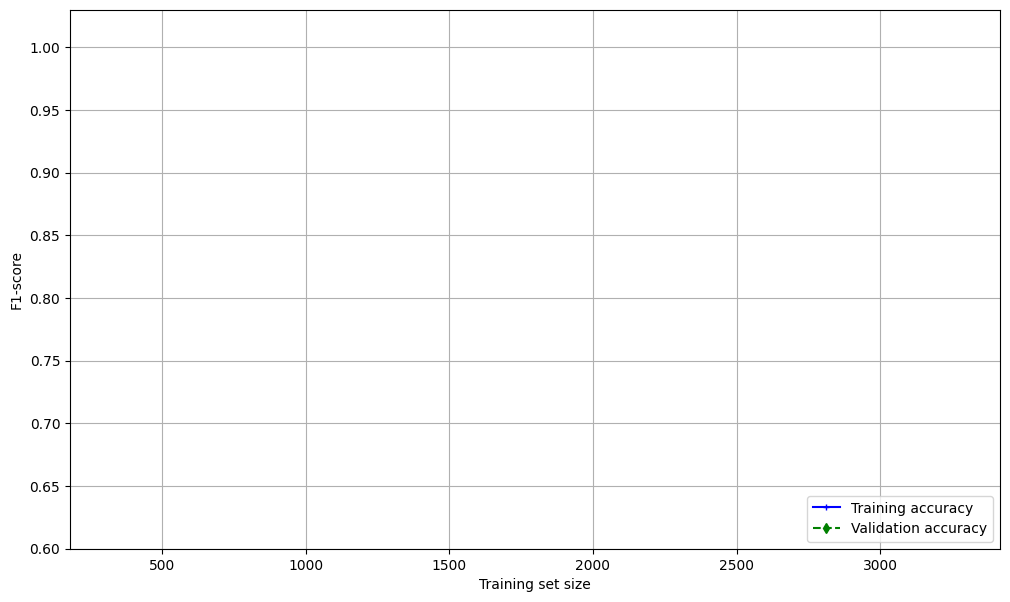

In [92]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

In [93]:
range_C = [0.001,0.01,0.1,1,10,100]
train_scores, test_scores = validation_curve(cls,
        X=X_train, 
        y=y_train, 
        param_range=
        range_C, 
        param_name='classifier__C',
        cv=5, 
        n_jobs=-1, 
        scoring='f1'
)

(0.05, 100)

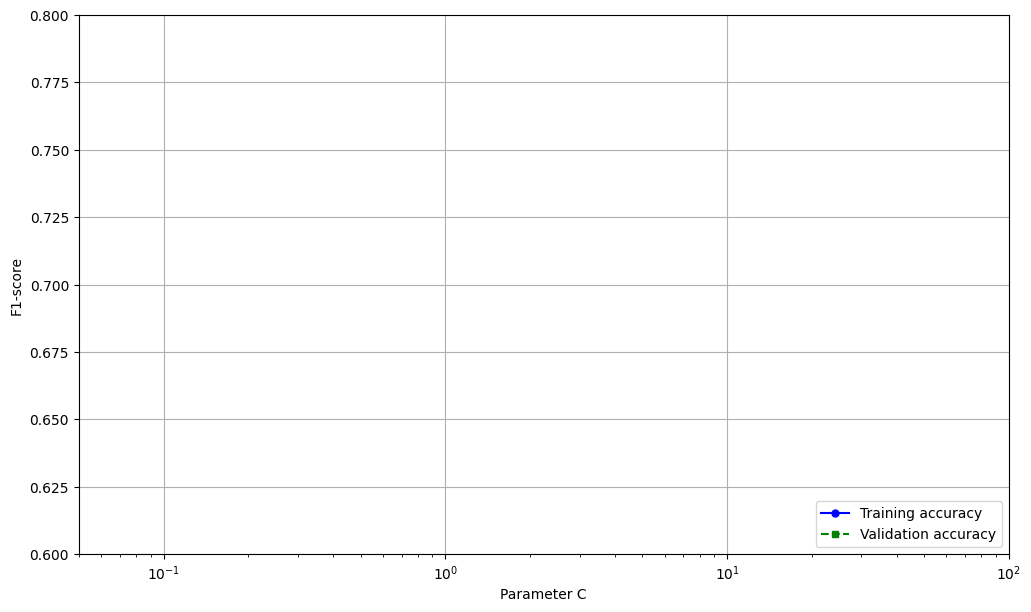

In [94]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter C')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.6, 0.8])
ax.set_xscale('log')
ax.set_xlim([0.05,100])